<a href="https://colab.research.google.com/github/seeedata/BADA/blob/main/%EC%9D%B4%EC%83%81%EC%B9%98%20%ED%83%90%EC%A7%80%20%EA%B8%B0%EB%B0%98%20%EB%8C%80%EC%B6%9C%20%EC%97%B0%EC%B2%B4%EC%9E%90%20%EC%A0%81%EB%B0%9C%20%EC%8B%9C%EC%8A%A4%ED%85%9C/Autoencoder%20%EB%AA%A8%EB%8D%B8%20(PCA%20X).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 처리

## 데이터 불러오기

In [ ]:
raw_df = pd.read_csv('/content/drive/MyDrive/이상치탐지/anomaly_detecting.csv')

In [ ]:
raw_df = raw_df.iloc[:,2:]
raw_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
raw_df.replace('XNA', np.nan, inplace=True)

In [ ]:
raw_df_na = pd.DataFrame(raw_df.isnull().sum(), columns=["Na"])
raw_df_na.to_csv('/content/drive/MyDrive/이상치탐지/이상치_데이터_프레임/결측치.csv')

<Axes: xlabel='Na', ylabel='Count'>

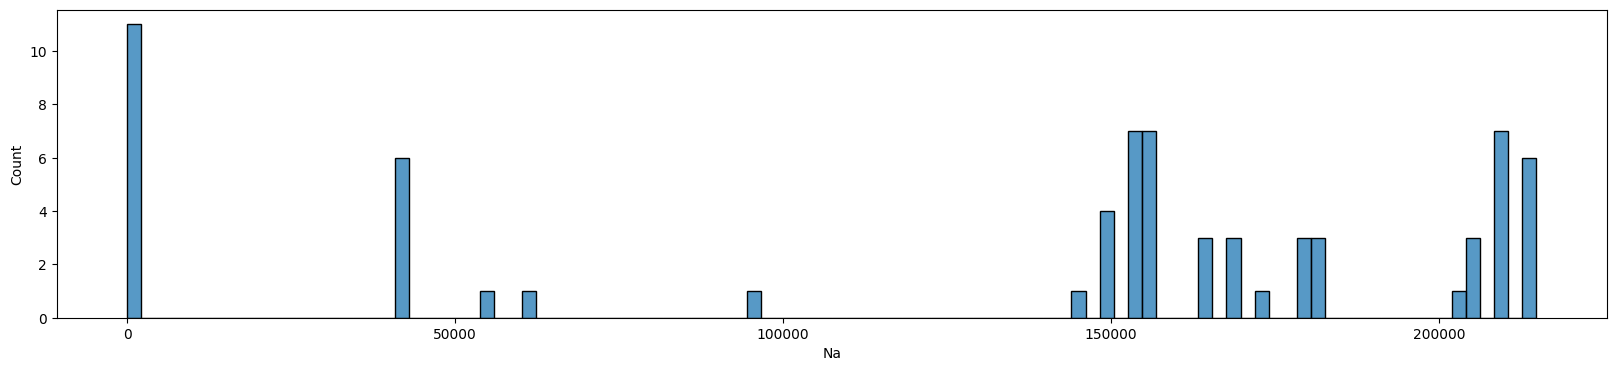

In [ ]:
plt.figure(figsize=(20,4))
sns.histplot(x='Na', data = raw_df_na[raw_df_na['Na'] != 0], bins = 100)

In [ ]:
remove_col = list(raw_df_na[raw_df_na['Na'] >= 10000].index)

In [ ]:
new_df = raw_df.drop(labels=remove_col,axis=1)
new_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,0,0,0,0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0,0,0,0,0,0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = new_df['TARGET']
X = new_df.drop(labels='TARGET',axis=1)

## 데이터 형식 바꾸기 + 결측치 대체

- Categorical 변수

- Numerical 변수

In [ ]:
category_list = list(X.dtypes[X.dtypes == 'object'].index)
numerical_list = list(X.dtypes[X.dtypes == 'int64'].index) + list(X.dtypes[X.dtypes == 'float64'].index)

In [ ]:
X['CODE_GENDER'].replace({'F': 1, 'M': 0}, inplace = True)
X['FLAG_OWN_CAR'].replace({'Y': 1, 'N': 0}, inplace = True)
X['FLAG_OWN_REALTY'].replace({'Y': 1, 'N': 0}, inplace = True)
X['NAME_CONTRACT_TYPE'].replace({'Cash loans':1,'Revolving loans':0}, inplace = True)
X['NAME_TYPE_SUITE'].replace({'Unaccompanied':0, 'Family':1, 'Spouse, partner':2, 'Children':3, 'Other_A':4,'Other_B':5, 'Group of people':6}, inplace = True)
X['NAME_INCOME_TYPE'].replace({'Working':0, 'State servant':1, 'Commercial associate':2, 'Pensioner':3, 'Unemployed':4,'Student':5, 'Businessman':6, 'Maternity leave':7}, inplace = True)
X['NAME_EDUCATION_TYPE'].replace({'Secondary / secondary special':0, 'Higher education':1, 'Incomplete higher':2, 'Lower secondary':3, 'Academic degree':4}, inplace = True)
X['NAME_FAMILY_STATUS'].replace({'Single / not married':0, 'Married':1, 'Civil marriage':2, 'Widow':3, 'Separated':4, 'Unknown':5}, inplace = True)
X['NAME_HOUSING_TYPE'].replace({'House / apartment':0, 'Rented apartment':1, 'With parents':2, 'Municipal apartment':3, 'Office apartment':4, 'Co-op apartment':5}, inplace = True)
X['WEEKDAY_APPR_PROCESS_START'].replace({'WEDNESDAY':0, 'MONDAY':1, 'THURSDAY':2, 'SUNDAY':3, 'SATURDAY':4, 'FRIDAY':5, 'TUESDAY':6}, inplace = True)

## 결측치 제거하기

In [ ]:
from sklearn.impute import SimpleImputer

# 평균으로 Imputer 선언
imputer_mean = SimpleImputer(strategy='mean')
imputer_mean.fit(X[numerical_list])

X[numerical_list] = pd.DataFrame(imputer_mean.transform(X[numerical_list]))

In [ ]:
from sklearn.impute import SimpleImputer

# 최빈값으로 Imputer 선언
imputer_mode = SimpleImputer(strategy='most_frequent')
imputer_mode.fit(X[category_list])

X[category_list]  = imputer_mode.transform(X[category_list] )

In [ ]:
X[category_list] = X[category_list].astype('category')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 62 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   NAME_CONTRACT_TYPE           307511 non-null  category
 1   CODE_GENDER                  307511 non-null  category
 2   FLAG_OWN_CAR                 307511 non-null  category
 3   FLAG_OWN_REALTY              307511 non-null  category
 4   CNT_CHILDREN                 307511 non-null  float64 
 5   AMT_INCOME_TOTAL             307511 non-null  float64 
 6   AMT_CREDIT                   307511 non-null  float64 
 7   AMT_ANNUITY                  307511 non-null  float64 
 8   AMT_GOODS_PRICE              307511 non-null  float64 
 9   NAME_TYPE_SUITE              307511 non-null  category
 10  NAME_INCOME_TYPE             307511 non-null  category
 11  NAME_EDUCATION_TYPE          307511 non-null  category
 12  NAME_FAMILY_STATUS           307511 non-null

In [ ]:
(X.isna().sum() != 0).sum() # 결측치 제거 완

0

In [ ]:
# Target 변수 변환

y[y=='.'] = np.nan
y.value_counts()

0    105347
1      9341
0      4880
1       433
Name: TARGET, dtype: int64

In [ ]:
y_train = y[y.index <= 120000]
y_test = y[y.index >= 120001]

In [ ]:
y_train = y_train.astype('int64')
y_train.value_counts()

0    110227
1      9774
Name: TARGET, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 데이터를 정규화하고 스케일 조정
X[numerical_list] = scaler.fit_transform(X[numerical_list])
X

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1.0,0.0,0.0,1.0,0.0,0.001512,0.090287,0.090032,0.077441,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.002089,0.311736,0.132924,0.271605,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.000358,0.022472,0.020025,0.023569,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.000935,0.066837,0.109477,0.063973,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.000819,0.116854,0.078975,0.117845,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.0,0.0,0.0,0.0,0.0,0.001127,0.052360,0.101176,0.046016,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,1.0,1.0,0.0,1.0,0.0,0.000396,0.056067,0.040505,0.046016,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307508,1.0,1.0,0.0,1.0,0.0,0.001089,0.157969,0.110618,0.135802,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,1.0,1.0,0.0,1.0,0.0,0.001243,0.081175,0.072499,0.069585,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.021950,0.001224,0.138334,0.099423,0.124179,0.284944,0.518151,0.213300,0.797904,0.583965,...,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335
std,0.038006,0.002027,0.100497,0.056525,0.092101,0.191521,0.245997,0.368717,0.142789,0.209733,...,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000742,0.056180,0.058143,0.049383,0.134537,0.312683,0.039545,0.696843,0.402668,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.001039,0.116987,0.090821,0.102132,0.257000,0.534329,0.043583,0.817445,0.547867,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.052632,0.001512,0.190674,0.128624,0.159371,0.392880,0.722435,0.045994,0.918531,0.761012,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train = X[X.index <= 120000]
X_test = X[X.index >= 120001]

In [ ]:
y_train_bool = y_train.astype(bool)
y_train_bool # 연체를 true

0          True
1         False
2         False
3         False
4         False
          ...  
119996    False
119997    False
119998    False
119999    False
120000    False
Name: TARGET, Length: 120001, dtype: bool

In [ ]:
X_train_nodefault = X_train[~y_train_bool]
X_train_default = X_train[y_train_bool]

# Autoencoder

- 변수 전체 사용

X 설명

- 변수: 62개 (결측치 10000인 column은 이미 삭제)
- 결측치 (범주형 변수: 최빈값, 연속형 변수: 평균 사용)

Flow 설명

1.데이터셋 분리 (X_train, y_train 다시 train, valid로 나누기)
  - train set은 모델 제작 -> X_train만 사용
  - validation set은 모델 성능 검증할 때 사용할 것.

2.이상치탐지 모델 제작 (X_train)

3.이상치탐지 모델 적용 (X_test 넣어서 Y_pred 얻기)
  - Y_pred 데이터 프레임으로 출력

## 데이터셋 분리

In [ ]:
# 12만개 X, y train_raw로 저장

X_train_raw = X_train.copy()
y_train_raw = y_train.copy()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid = train_test_split(X_train_raw, test_size=0.3, random_state=123)

In [ ]:
y_train = y_train_raw[X_train.index]
y_valid = y_train_raw[X_valid.index]

In [ ]:
# 7:3 잘 분리 확인

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(84000, 62)
(84000,)
(36001, 62)
(36001,)


## 이상치 탐지 모델 1

https://dacon.io/codeshare/5104
해당 링크 참고해서 제작.

In [ ]:
## 라이브러리 불러오기
'''시각화 관련 라이브러리'''
color = sns.color_palette()
import matplotlib as mpl
%matplotlib inline

'''데이터 준비 및 모델 평가 관련 라이브러리'''
from sklearn import preprocessing as pp
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

'''알고리즘 관련 라이브러리'''
import lightgbm as lgb

'''텐서플로 및 케라스 관련 라이브러리'''
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout
from keras.layers import BatchNormalization, Input, Lambda
from keras import regularizers
from keras.losses import mse, binary_crossentropy

**재구성 오차가 낮은 사람은 정상, 1에 가까운 사람은 default의 가능성이 크다.**

- 이를 알 수 있게 anomalyScore 함수 정의

In [ ]:
tf.random.set_seed(89)

In [ ]:
# 이상치 스코어 함수 정의

def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF) - np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss, index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

In [ ]:
# 그래프 함수 정의

def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    precision, recall, thresholds = \
        precision_recall_curve(preds['trueLabel'], \
                               preds['anomalyScore'])
    average_precision = average_precision_score( \
                        preds['trueLabel'], preds['anomalyScore'])

    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])

    plt.title('Precision-Recall curve: Average Precision = \
        {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'], \
                                     preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: Area under the \
        curve = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()

    if returnPreds==True:
        return preds, average_precision  ### diff

In [ ]:
# input layer
input_layer = Input(shape=(X_train.shape[1],))

## encoding part
encoded = Dense(64, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(16, activation='relu')(encoded)

#인코더의 최종 레이어,code dim 차원으로 축소된 표현 생성하는 역할
code = Dense(2, activation='relu')(encoded)

## decoding part
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)

## output layer
output_layer = Dense(X.shape[1], activation='relu')(decoded)

autoencoder1 = Model(input_layer, output_layer, name='anomaly')

In [ ]:
# 모델 컴파일

autoencoder1.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# 모델 훈련

num_epochs = 10
batch_size = 32

history = autoencoder1.fit(x=X_train, y=X_train,
                        epochs=num_epochs,
                        batch_size=batch_size,
                        shuffle=True,
                        validation_data=(X_valid, X_valid),
                        verbose=1)

Epoch 1/10
2625/2625 [==============================] - 10s 3ms/step - loss: 0.0830 - val_loss: 0.0635
Epoch 2/10
2625/2625 [==============================] - 11s 4ms/step - loss: 0.0612 - val_loss: 0.0601
Epoch 3/10
2625/2625 [==============================] - 7s 3ms/step - loss: 0.0594 - val_loss: 0.0591
Epoch 4/10
2625/2625 [==============================] - 11s 4ms/step - loss: 0.0588 - val_loss: 0.0587
Epoch 5/10
2625/2625 [==============================] - 7s 3ms/step - loss: 0.0585 - val_loss: 0.0584
Epoch 6/10
2625/2625 [==============================] - 11s 4ms/step - loss: 0.0583 - val_loss: 0.0583
Epoch 7/10
2625/2625 [==============================] - 9s 3ms/step - loss: 0.0582 - val_loss: 0.0582
Epoch 8/10
2625/2625 [==============================] - 9s 3ms/step - loss: 0.0581 - val_loss: 0.0582
Epoch 9/10
2625/2625 [==============================] - 8s 3ms/step - loss: 0.0580 - val_loss: 0.0581
Epoch 10/10
2625/2625 [==============================] - 10s 4ms/step - loss: 

In [ ]:
# 모델 검증 (valid 사용)

predictions = autoencoder1.predict(X_valid, verbose=2)
anomalyScoresAE = anomalyScores(X_valid, pd.DataFrame(predictions))

1126/1126 - 2s - 2s/epoch - 2ms/step


In [ ]:
error_df = pd.DataFrame({'reconstruction_error': anomalyScoresAE, 'true_class': y_valid})

In [ ]:
error_df.describe()

,reconstruction_error,true_class
count,36001.000000,36001.000000
mean,0.183521,0.082164
std,0.058353,0.274619
min,0.000000,0.000000
25%,0.156136,0.000000
50%,0.174691,0.000000
75%,0.213359,0.000000
max,1.000000,1.000000


(array([9.0500e+02, 2.2335e+04, 8.3490e+03, 1.2330e+03, 2.0200e+02,
        1.6000e+01, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

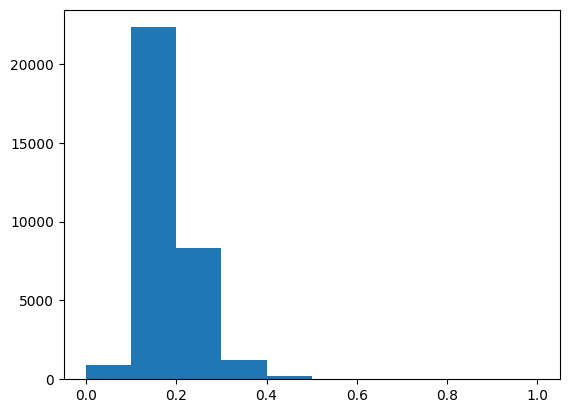

In [ ]:
# not default 데이터
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0)]
ax.hist(normal_error_df.reconstruction_error.values, bins=10)

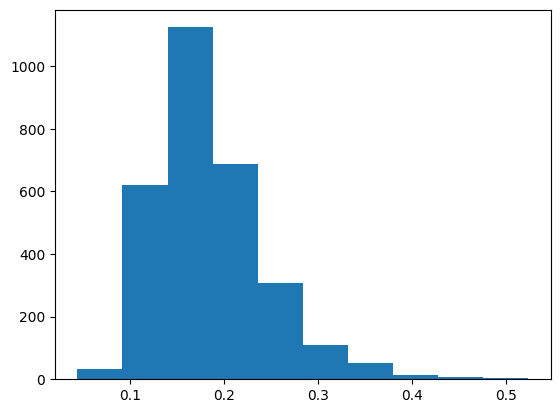

In [ ]:
# default 데이터
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

### Threshold 조정

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

In [ ]:
#임계값 조정 함수
#iterations:임계값을 튜닝하기 위한 반복 횟수
#각 임계값에 대한 정확도, 정밀도, 재현율 등의 지표를 나타냄
def thresholdTuning(df, iterations):

    thresh_df = {
        'threshold': [],
        'accuracy': [],
        'precision': [],
        'recall': []
    }

    for i in range(iterations):
        #quantile 함수를 사용하여 error 열에서 재구성 오차의 분위수를 통해 임계값 계산한다
        thresh_value = df['reconstruction_error'].quantile(i/iterations)
        preds = df['reconstruction_error'] > thresh_value
        cr = classification_report(df['true_class'], preds, output_dict=True)
        acc = cr['accuracy']
        prec = cr['macro avg']['precision']
        rc = cr['macro avg']['recall']

        thresh_df['threshold'].append(thresh_value)
        thresh_df['accuracy'].append(acc)
        thresh_df['precision'].append(prec)
        thresh_df['recall'].append(rc)

    return pd.DataFrame(thresh_df)

thresh_df = thresholdTuning(error_df, 100)

In [ ]:
#accuracy score이 최대인 임계값 출력
threshold = thresh_df[thresh_df['accuracy'] == thresh_df['accuracy'].max()]['threshold'].values[0]
print(f"Threshold with Maximum accuracy: {threshold:.6f}")

Threshold with Maximum accuracy: 0.370385


In [ ]:
thresh_df

,threshold,accuracy,precision,recall
0,0.000000,0.082192,0.541083,0.500015
1,0.063675,0.091192,0.516315,0.502148
2,0.090174,0.100303,0.517862,0.504648
3,0.101188,0.109025,0.515173,0.505860
4,0.103448,0.117469,0.512072,0.506151
...,...,...,...,...
95,0.294254,0.876559,0.502662,0.501677
96,0.303629,0.884892,0.503141,0.501599
97,0.313139,0.893003,0.502034,0.500785
98,0.344943,0.901225,0.501305,0.500339


In [ ]:
thresh_df[thresh_df['accuracy'] == thresh_df['accuracy'].max()]

,threshold,accuracy,precision,recall
99,0.370385,0.909558,0.501993,0.500262


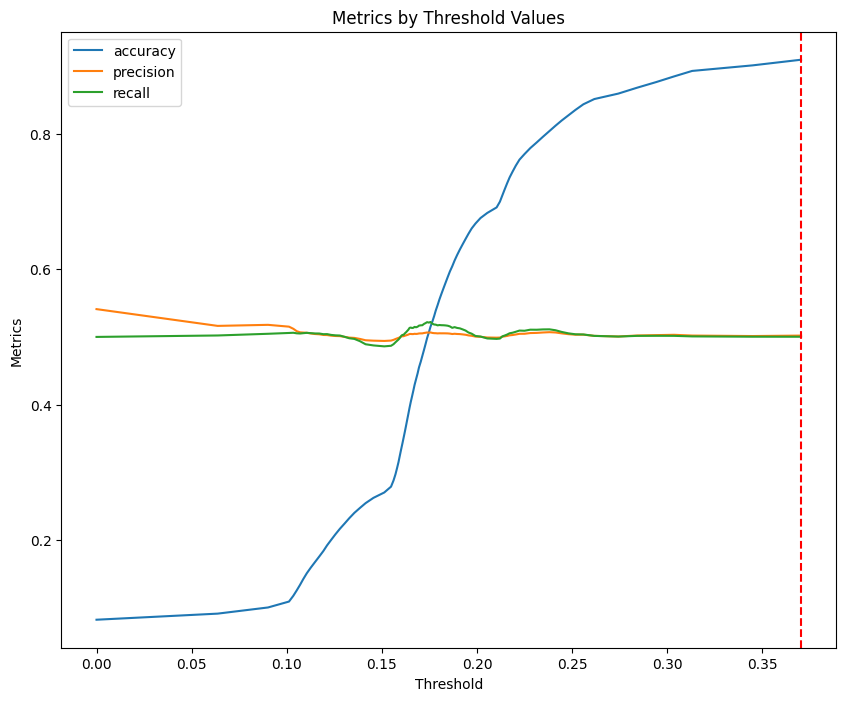

In [ ]:
#시각화를 통해 성능지표가 임계값에 따라 어떻게 변하는지 살펴보자.
plt.figure(figsize=(10,8))
plt.plot(thresh_df['threshold'], thresh_df['accuracy'], label='accuracy')
plt.plot(thresh_df['threshold'], thresh_df['precision'], label='precision')
plt.plot(thresh_df['threshold'], thresh_df['recall'], label='recall')
plt.axvline(x=threshold, color='r', linestyle='dashed')
plt.xlabel('Threshold')
plt.ylabel('Metrics')
plt.title('Metrics by Threshold Values')
plt.legend()
plt.show()

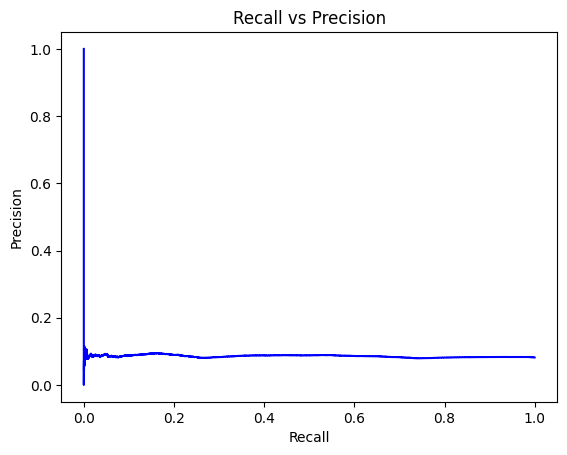

In [ ]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

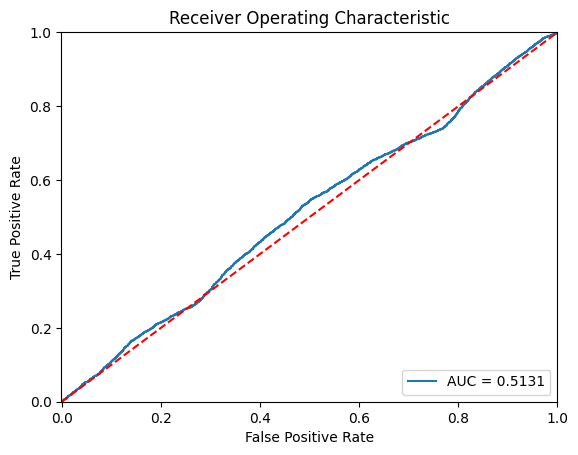

In [ ]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

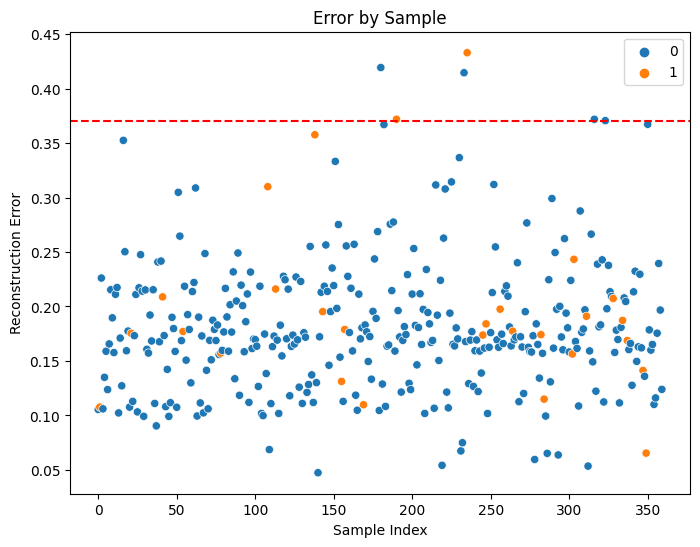

In [ ]:
#산점도를 통해 재구성 오차의 분포, 임계값을 기준으로 어떤 샘플들이 이상치로 판별되는지 시각적으로 확인!
temp = error_df.sample(frac=0.01, random_state=42).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.scatterplot(data=temp, x=temp.index, y='reconstruction_error', hue='true_class')
plt.axhline(y=threshold, color='r', linestyle='dashed')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Error by Sample')
plt.legend()
plt.show()

### 성능검정

In [ ]:
#재구성 오차, 실제 클래스 레이블, 임계값을 기반으로 예측된 이상치 여부가 담긴 dataframe

error_df['y_pred'] = error_df['reconstruction_error'] > threshold
error_df.head()

,reconstruction_error,true_class,y_pred
30870,0.294313,0,False
7738,0.174502,0,False
25351,0.335588,1,False
74309,0.186160,0,False
88347,0.164580,0,False


In [ ]:
#이상치탐지모델 성능평가 보고서
print(classification_report(error_df['true_class'],error_df['y_pred']))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     33043
           1       0.09      0.01      0.02      2958

    accuracy                           0.91     36001
   macro avg       0.50      0.50      0.49     36001
weighted avg       0.85      0.91      0.88     36001



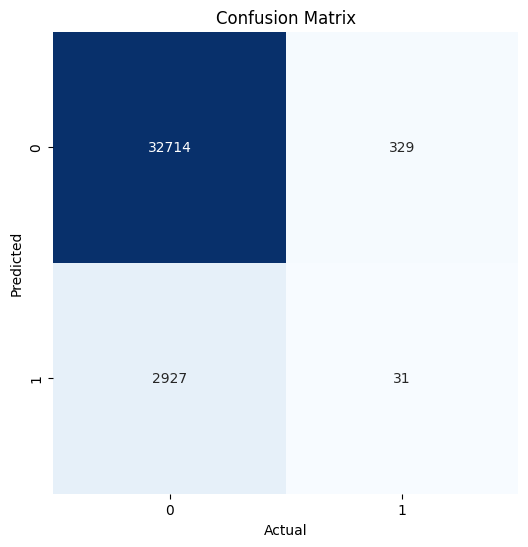

In [ ]:
#confusion matrix
cm = confusion_matrix(error_df['true_class'],error_df['y_pred'])
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='.6g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## 이상치 탐지 모델 2

-> model1에서의 문제

문제: (그냥 탐지를 못함...)

가정: 변수가 너무 많은가? => 변수 설명 보고 더 걸러보자. (38개)

In [ ]:
X_train.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS

In [ ]:
select_col = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']

In [ ]:
X_train_sel = X_train[select_col]
X_valid_sel = X_valid[select_col]

### 위에서 한 거 반복

In [ ]:
# input layer
input_layer = Input(shape=(X_train_sel.shape[1],))

## encoding part
encoded = Dense(64, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(32, activation='relu')(encoded)

## decoding part
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)

## output layer
output_layer = Dense(X_train_sel.shape[1], activation='relu')(decoded)

autoencoder2 = Model(input_layer, output_layer, name='anomaly')

In [ ]:
autoencoder2.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
num_epochs = 10
batch_size = 32

history = autoencoder2.fit(x= X_train_sel, y= X_train_sel,
                        epochs=num_epochs,
                        batch_size=batch_size,
                        shuffle=True,
                        validation_data=(X_valid_sel, X_valid_sel),
                        verbose=1)

Epoch 1/10
2625/2625 [==============================] - 11s 4ms/step - loss: 0.0200 - val_loss: 0.0069
Epoch 2/10
2625/2625 [==============================] - 7s 3ms/step - loss: 0.0064 - val_loss: 0.0061
Epoch 3/10
2625/2625 [==============================] - 11s 4ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 4/10
2625/2625 [==============================] - 8s 3ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 5/10
2625/2625 [==============================] - 9s 3ms/step - loss: 0.0051 - val_loss: 0.0051
Epoch 6/10
2625/2625 [==============================] - 8s 3ms/step - loss: 0.0050 - val_loss: 0.0050
Epoch 7/10
2625/2625 [==============================] - 10s 4ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 8/10
2625/2625 [==============================] - 8s 3ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 9/10
2625/2625 [==============================] - 9s 4ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 10/10
2625/2625 [==============================] - 9s 3ms/step - loss: 0.

In [ ]:
# 모델 검증 (valid 사용)

predictions2 = autoencoder2.predict(X_valid_sel, verbose=1)
anomalyScoresAE2 = anomalyScores(X_valid_sel, pd.DataFrame(predictions2))

1126/1126 [==============================] - 2s 2ms/step


In [ ]:
error_df2 = pd.DataFrame({'reconstruction_error': anomalyScoresAE2, 'true_class': y_valid})

(array([2.9592e+04, 9.0000e+00, 1.7550e+03, 5.0000e+00, 9.9600e+02,
        4.8900e+02, 1.0000e+00, 1.8800e+02, 1.0000e+00, 7.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

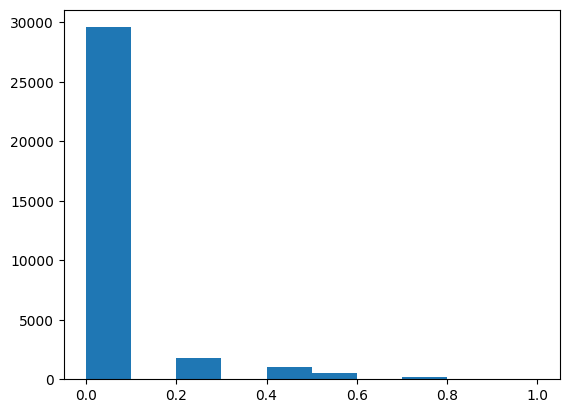

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df2 = error_df2[(error_df2['true_class']== 0)]
ax.hist(normal_error_df2.reconstruction_error.values, bins=10)

(array([2.632e+03, 0.000e+00, 0.000e+00, 1.640e+02, 0.000e+00, 0.000e+00,
        1.520e+02, 0.000e+00, 1.000e+00, 9.000e+00]),
 array([2.38212431e-05, 7.62830494e-02, 1.52542277e-01, 2.28801506e-01,
        3.05060734e-01, 3.81319962e-01, 4.57579190e-01, 5.33838418e-01,
        6.10097646e-01, 6.86356874e-01, 7.62616102e-01]),
 <BarContainer object of 10 artists>)

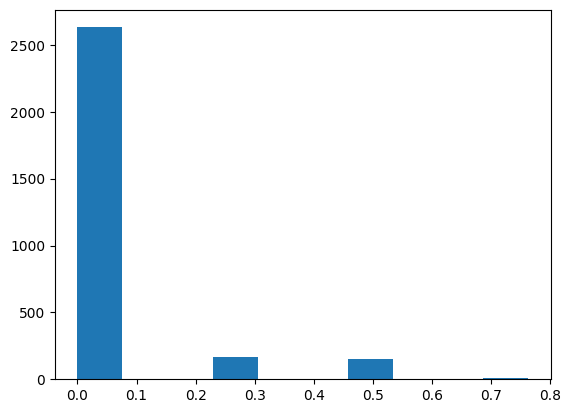

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df2 = error_df2[error_df2['true_class'] == 1]
ax.hist(fraud_error_df2.reconstruction_error.values, bins=10)

In [ ]:
#임계값 조정 함수
#iterations:임계값을 튜닝하기 위한 반복 횟수
#각 임계값에 대한 정확도, 정밀도, 재현율 등의 지표를 나타냄
def thresholdTuning(df, iterations):

    thresh_df = {
        'threshold': [],
        'accuracy': [],
        'precision': [],
        'recall': []
    }

    for i in range(iterations):
        #quantile 함수를 사용하여 error 열에서 재구성 오차의 분위수를 통해 임계값 계산한다
        thresh_value = df['reconstruction_error'].quantile(i/iterations)
        preds = df['reconstruction_error'] > thresh_value
        cr = classification_report(df['true_class'], preds, output_dict=True)
        acc = cr['accuracy']
        prec = cr['macro avg']['precision']
        rc = cr['macro avg']['recall']

        thresh_df['threshold'].append(thresh_value)
        thresh_df['accuracy'].append(acc)
        thresh_df['precision'].append(prec)
        thresh_df['recall'].append(rc)

    return pd.DataFrame(thresh_df)

thresh_df2 = thresholdTuning(error_df2, 20)

In [ ]:
threshold2 = thresh_df2[thresh_df2['accuracy'] == thresh_df2['accuracy'].max()]['threshold'].values[0]
print(f"Threshold with Maximum accuracy: {threshold2:.6f}")

Threshold with Maximum accuracy: 0.495580


In [ ]:
thresh_df2[thresh_df2['recall'] == thresh_df2['recall'].max()]

,threshold,accuracy,precision,recall
19,0.49558,0.876503,0.50237,0.501492


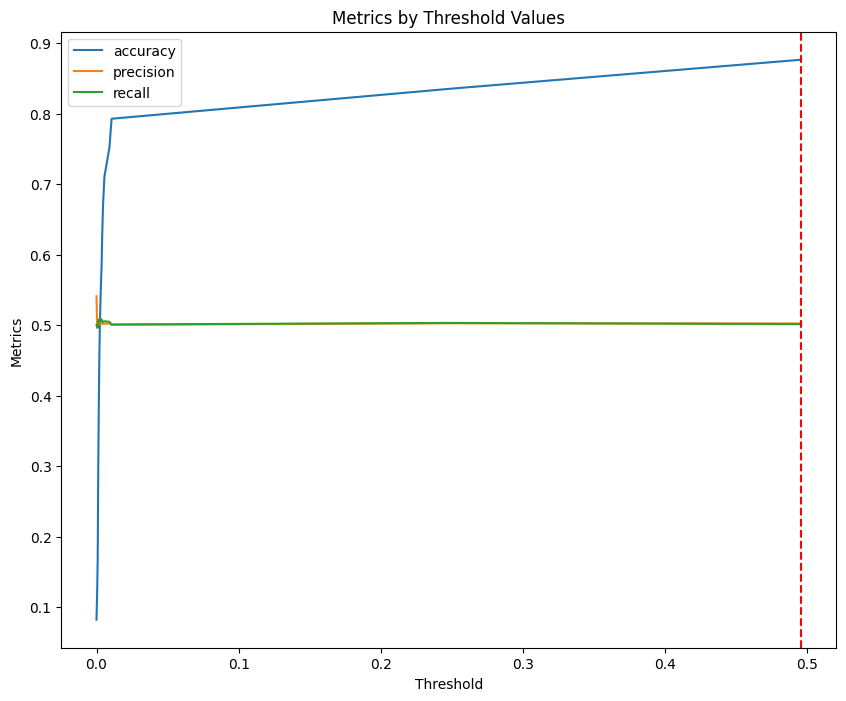

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(thresh_df2['threshold'], thresh_df2['accuracy'], label='accuracy')
plt.plot(thresh_df2['threshold'], thresh_df2['precision'], label='precision')
plt.plot(thresh_df2['threshold'], thresh_df2['recall'], label='recall')
plt.axvline(x=threshold2, color='r', linestyle='dashed')
plt.xlabel('Threshold')
plt.ylabel('Metrics')
plt.title('Metrics by Threshold Values')
plt.legend()
plt.show()

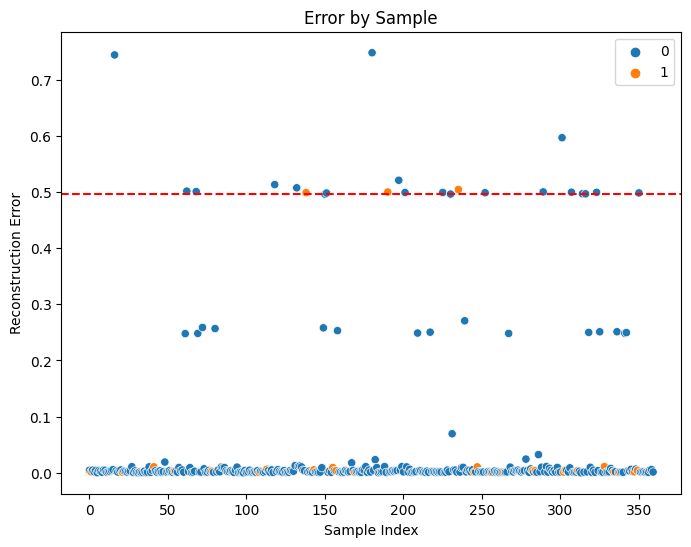

In [ ]:
#산점도를 통해 재구성 오차의 분포, 임계값을 기준으로 어떤 샘플들이 이상치로 판별되는지 시각적으로 확인!
temp = error_df2.sample(frac=0.01, random_state=42).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.scatterplot(data=temp, x=temp.index, y='reconstruction_error', hue='true_class')
plt.axhline(y=threshold2, color='r', linestyle='dashed')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Error by Sample')
plt.legend()
plt.show()

### 성능 검정

In [ ]:
#재구성 오차, 실제 클래스 레이블, 임계값을 기반으로 예측된 이상치 여부가 담긴 dataframe

error_df2['y_pred'] = error_df2['reconstruction_error'] > threshold2
error_df2.head()

,reconstruction_error,true_class,y_pred
30870,0.745152,0,True
7738,0.004276,0,False
25351,0.001404,1,False
74309,0.018419,0,False
88347,0.000706,0,False


In [ ]:
#이상치탐지모델 성능평가 보고서
print(classification_report(error_df2['true_class'],error_df2['y_pred']))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     33043
           1       0.09      0.05      0.07      2958

    accuracy                           0.88     36001
   macro avg       0.50      0.50      0.50     36001
weighted avg       0.85      0.88      0.86     36001



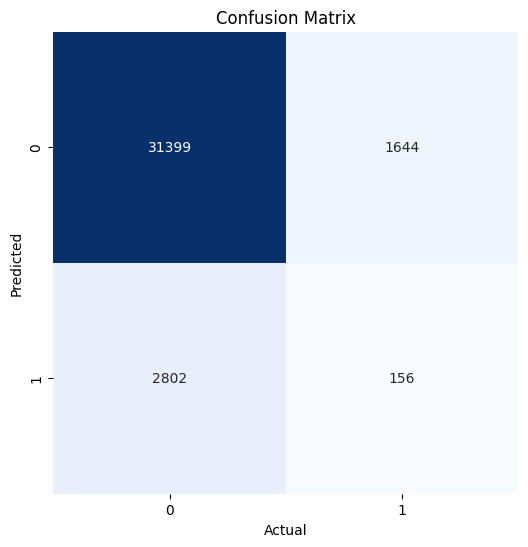

In [ ]:
#confusion matrix
cm = confusion_matrix(error_df2['true_class'],error_df2['y_pred'])
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='.6g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()